Это ноутбук для просмотра статистики по собранному из PDB датасету

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("/home/domain/vladislove2020/JupiterNotebooks/masif_na/protein_na_complexes_info.json", "r") as js:
    dataset = json.load(fp=js)

In [3]:
dataset_clean = {}

for pdb_id, info in dataset.items():
    if len(info["chains"]) != 0:
        dataset_clean[pdb_id] = info
        
len(dataset_clean)

14076

In [12]:
with open("/home/domain/vladislove2020/JupiterNotebooks/masif_na/protein_na_complexes_info_clean.json", "w") as js:
    json.dump(
        fp=js,
        obj=dataset_clean,
        indent=4,
        ensure_ascii=False
    )

In [13]:
len(dataset_clean)

14076

In [14]:
list(dataset_clean.keys())[0]

'1NZ1'

In [15]:
dataset_clean["1NZ1"]

{'pdb_id': '1NZ1',
 'dna': False,
 'rna': True,
 'protein': False,
 'chains': {'A': {'ids': ['A'],
   'auth_ids': ['A'],
   'chem_comp_monomers': ['A', 'C', 'G', 'SSU', 'U'],
   'molecule_type': 'RNA',
   'sequence': 'GGUUCCCCUGCAUAAGGAUGAACC',
   'entity_id': 1}}}

In [4]:
molecule_types = ["dna", "rna", "protein"]

complex_stats = []

for i in range(2 ** (len(molecule_types))):
    descriptor = []
    while i != 0:
        descriptor.append(i % 2)
        i = i // 2
    descriptor = descriptor[: : -1]
    additional_len = len(molecule_types) - len(descriptor)
    descriptor = [0] * additional_len + descriptor

    new_item = {}

    for j, molecule_type in enumerate(molecule_types):
        new_item[molecule_type] = descriptor[j]

    new_item["count"] = len(
        [
            pdb_id for pdb_id in dataset_clean
            if descriptor == [int(dataset_clean[pdb_id][molecule_type]) for molecule_type in molecule_types]
        ]
    )

    complex_stats.append(new_item)

df = pd.DataFrame(complex_stats)
df.set_index("count", inplace=True)
df

,dna,rna,protein
count,,,
0,0,0,0
0,0,0,1
1355,0,1,0
4269,0,1,1
1451,1,0,0
5818,1,0,1
59,1,1,0
1124,1,1,1


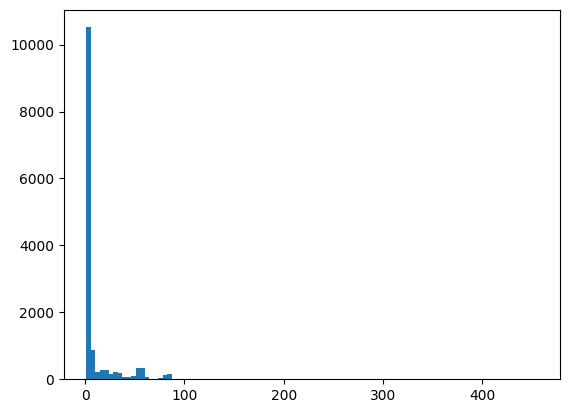

In [17]:
# Распределение по количеству цепей
plt.hist(
    [len(item["chains"]) for item in dataset_clean.values()],
    bins=100
);

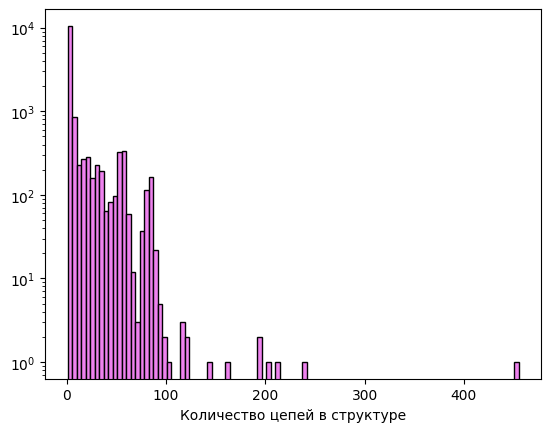

In [37]:
# Распределение по количеству цепей (log по y)
plt.hist(
    [len(item["chains"]) for item in dataset_clean.values()],
    bins=100,
    color="violet",
    edgecolor="black"
)
plt.xlabel("Количество цепей в структуре")
plt.yscale('log')
plt.savefig("/mnt/storage/vladislove2020/NP_benchmark/plots/dataset_total_chains.png", dpi=300);

In [25]:
for item in dataset_clean.values():
    if len(item["chains"]) > 100:
        print(item["pdb_id"], len(item["chains"]))

8APN 121
4V5X 162
8APO 119
7ARV 195
7AS5 455
6BY7 118
8A22 116
9G6K 102
7BHO 238
7ANE 122
7ARE 203
7ART 212
7ARY 192
6HIV 142


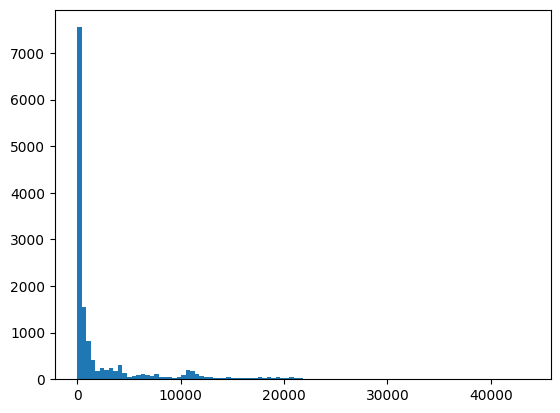

In [18]:
# Распределение по общей длине цепей
plt.hist(
    [len("".join([chain["sequence"] for chain in item["chains"].values()])) for item in dataset_clean.values()],
    bins=100
);

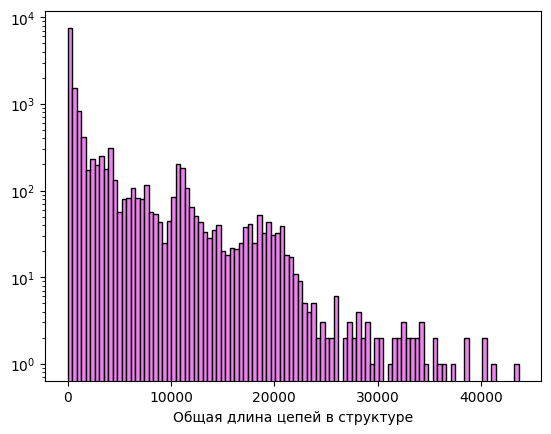

In [36]:
# Распределение по общей длине цепей (log по y)
plt.hist(
    [len("".join([chain["sequence"] for chain in item["chains"].values()])) for item in dataset_clean.values()],
    bins=100,
    color="violet",
    edgecolor="black"
)
plt.xlabel("Общая длина цепей в структуре")
plt.yscale('log')
plt.savefig("/mnt/storage/vladislove2020/NP_benchmark/plots/dataset_total_length.png", dpi=300);

In [26]:
len([item for item in dataset_clean.values() if len("".join([chain["sequence"] for chain in item["chains"].values()])) < 1000])

9395